In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
data = pd.read_csv('/content/monthly_milk_production.csv')
data.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [ ]:
data.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
production = data['Production'].astype(float).values.reshape(-1,1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(production)

In [ ]:
scaled_data[:5]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923]])

In [ ]:
window_size = 12
x=[]
y=[]

target_dates = data.index[window_size:]

for i in range(window_size,len(scaled_data)):
  x.append(scaled_data[i-window_size:i,0])  #12 data X ma append hune as win size  is 12
  y.append(scaled_data[i,0])

x=np.array(x)
y=np.array(y)


In [ ]:
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    x, y, target_dates, test_size=0.2, shuffle=False
)


In [ ]:
X_train[:5]

array([[0.08653846, 0.01923077, 0.20913462, 0.24759615, 0.41826923,
        0.34615385, 0.20913462, 0.11057692, 0.03605769, 0.05769231,
        0.        , 0.06971154],
       [0.01923077, 0.20913462, 0.24759615, 0.41826923, 0.34615385,
        0.20913462, 0.11057692, 0.03605769, 0.05769231, 0.        ,
        0.06971154, 0.11298077],
       [0.20913462, 0.24759615, 0.41826923, 0.34615385, 0.20913462,
        0.11057692, 0.03605769, 0.05769231, 0.        , 0.06971154,
        0.11298077, 0.03125   ],
       [0.24759615, 0.41826923, 0.34615385, 0.20913462, 0.11057692,
        0.03605769, 0.05769231, 0.        , 0.06971154, 0.11298077,
        0.03125   , 0.24038462],
       [0.41826923, 0.34615385, 0.20913462, 0.11057692, 0.03605769,
        0.05769231, 0.        , 0.06971154, 0.11298077, 0.03125   ,
        0.24038462, 0.28846154]])

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train[:5]

array([[[0.08653846],
        [0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154]],

       [[0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154],
        [0.11298077]],

       [[0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154],
        [0.11298077],
        [0.03125   ]],

       [[0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154],
    

In [ ]:
model= Sequential([
    LSTM(128,return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(1)
])

model.compile('adam','mean_squared_error')

In [ ]:
history = model.fit(X_train,y_train,epochs = 100, batch_size=32,validation_split=0.1)



Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - loss: 0.1959 - val_loss: 0.0343
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0307 - val_loss: 0.0498
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0286 - val_loss: 0.0539
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0360 - val_loss: 0.0594
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0334 - val_loss: 0.0276
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0266 - val_loss: 0.0300
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0305 - val_loss: 0.0268
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0260 - val_loss: 0.0369
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0275 - val_loss: 0.0316
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0238 - val_loss: 0.0272
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0247 - val_loss: 0.0250
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0259 - val_l

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [ ]:
rmse = np.sqrt(np.mean((y_test - predictions)**2))

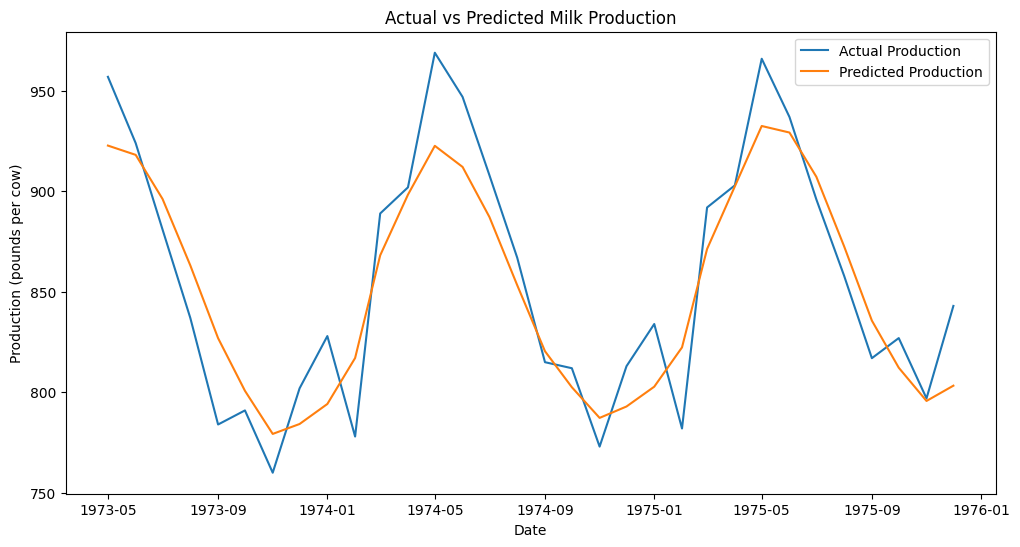

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test, label='Actual Production')
plt.plot(dates_test, predictions, label='Predicted Production')
plt.title('Actual vs Predicted Milk Production')
plt.xlabel('Date')
plt.ylabel('Production (pounds per cow)')
plt.legend()
plt.show()